##### 파이썬 웹 크롤링을 이용하여, 데이타를 수집하고 분석하는 방법을 알아본다.

In [43]:
# 필요로 하는 패키지,모듈,클래스 등을 import

import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 분석 대상 데이타를 가져올 소스사이트
# http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun=

# requests.get() 이용, 소스사이트를 가져온다.
source = requests.get('http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun=')

# html parsing, BeautifulSoup 이용
soup = BeautifulSoup(source.content,'html.parser')


# xpath of table : //*[@id="content"]/div/div[5]/table
# class name : num midsize

# 시도별 발생현황, 데이터를 가진 테이블을 찾는다.
# 검사결과, <table class = "num, midsize"
table = soup.find('table',{'class':'midsize'})
table = soup.find('tbody')

data = []

for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))
    rowdata = []
    for td in tds:
        rowdata.append(td.text.replace(',',''))
    data.append(rowdata)

# 데이타를 dataframe으로 변환
column_name = ['hap','dom','abr','conf','blocked','released','death','occrate']
index_name = ['합계','서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주','검역']
df = DataFrame(data, columns=column_name, index=index_name)


print(df)

    hap  dom abr    conf blocked released death occrate
합계  511  483  28  128283    7687   118717  1879  247.42
서울  163  163   0   39895    2692    36739   464  409.87
부산   14   13   1    5286     284     4880   122  154.93
대구    8    8   0    9448     111     9116   221  387.77
인천   21   20   1    5839     185     5594    60  197.52
광주   24   23   1    2518     107     2389    22  172.86
대전    7    7   0    1835     130     1685    20  124.48
울산   19   19   0    2247     386     1823    38  195.90
세종    0    0   0     386      27      358     1  112.76
경기  138  127  11   35852    2019    33225   608  270.57
강원   12   12   0    2843     184     2609    50  184.55
충북    4    4   0    2708     112     2531    65  169.31
충남   18   18   0    3175     181     2958    36  149.59
전북   12   12   0    2033     115     1860    58  111.87
전남   10   10   0    1178     141     1026    11   63.17
경북   15   15   0    4352     294     3979    79  163.45
경남   10    9   1    4268     367     3882    19 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 합계 to 검역
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hap       19 non-null     object
 1   dom       19 non-null     object
 2   abr       19 non-null     object
 3   conf      19 non-null     object
 4   blocked   19 non-null     object
 5   released  19 non-null     object
 6   death     19 non-null     object
 7   occrate   19 non-null     object
dtypes: object(8)
memory usage: 1.3+ KB


In [45]:
df.head()

,hap,dom,abr,conf,blocked,released,death,occrate
합계,511,483,28,128283,7687,118717,1879,247.42
서울,163,163,0,39895,2692,36739,464,409.87
부산,14,13,1,5286,284,4880,122,154.93
대구,8,8,0,9448,111,9116,221,387.77
인천,21,20,1,5839,185,5594,60,197.52


In [46]:
df.tail()

,hap,dom,abr,conf,blocked,released,death,occrate
전남,10,10,0,1178,141,1026,11,63.17
경북,15,15,0,4352,294,3979,79,163.45
경남,10,9,1,4268,367,3882,19,126.97
제주,24,23,1,816,110,705,1,121.66
검역,12,0,12,3604,242,3358,4,-


In [47]:
# ''hap','dom','abr','conf','blocked','released','death','occrate'

df['hap'] = df['hap'].astype(int)
df['dom'] = df['dom'].astype(int)
df['abr'] = df['abr'].astype(int)
df['conf'] = df['conf'].astype(int)
df['blocked'] = df['blocked'].astype(int)
df['released'] = df['released'].astype(int)
df['death'] = df['death'].astype(int)
# df['occrate'] = df['occrate'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 합계 to 검역
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hap       19 non-null     int32 
 1   dom       19 non-null     int32 
 2   abr       19 non-null     int32 
 3   conf      19 non-null     int32 
 4   blocked   19 non-null     int32 
 5   released  19 non-null     int32 
 6   death     19 non-null     int32 
 7   occrate   19 non-null     object
dtypes: int32(7), object(1)
memory usage: 1.4+ KB


In [52]:
df1 = df.drop('합계')
df1

,hap,dom,abr,conf,blocked,released,death,occrate
서울,163,163,0,39895,2692,36739,464,409.87
부산,14,13,1,5286,284,4880,122,154.93
대구,8,8,0,9448,111,9116,221,387.77
인천,21,20,1,5839,185,5594,60,197.52
광주,24,23,1,2518,107,2389,22,172.86
대전,7,7,0,1835,130,1685,20,124.48
울산,19,19,0,2247,386,1823,38,195.90
세종,0,0,0,386,27,358,1,112.76
경기,138,127,11,35852,2019,33225,608,270.57
강원,12,12,0,2843,184,2609,50,184.55


In [53]:
df1.describe()  # 기술통계량

,hap,dom,abr,conf,blocked,released,death
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,28.388889,26.833333,1.555556,7126.833333,427.055556,6595.388889,104.388889
std,45.092244,43.973588,3.649693,11403.712127,717.421074,10544.101028,167.436077
min,0.000000,0.000000,0.000000,386.000000,27.000000,358.000000,1.000000
25%,10.000000,8.250000,0.000000,2086.500000,112.750000,1832.250000,19.250000
50%,13.000000,12.500000,0.000000,3009.000000,182.500000,2783.500000,44.000000
75%,20.500000,19.750000,1.000000,5052.500000,291.500000,4654.750000,75.500000
max,163.000000,163.000000,12.000000,39895.000000,2692.000000,36739.000000,608.000000


In [54]:
df1.sum(axis=1)

서울    80116
부산    10600
대구    18912
인천    11720
광주     5084
대전     3684
울산     4532
세종      772
경기    71980
강원     5710
충북     5424
충남     6386
전북     4090
전남     2376
경북     8734
경남     8556
제주     1680
검역     7232
dtype: int64

In [40]:
!pip install seaborn

In [55]:
import seaborn as sns
sns.set()

<BarContainer object of 18 artists>

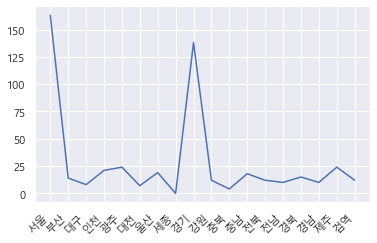

In [72]:
# https://wikidocs.net/45798

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')                       # 핵심내용
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝


# x 축 글자 기울이기
# https://www.delftstack.com/ko/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

fig,ax = plt.subplots()
plt.plot(x, y)
fig.autofmt_xdate(rotation=45)
plt.grid(True)


axes = figure.add_subplot(2, 2, 1)
axes1 = figure.add_subplot(2, 2, 2)
# axes2 = figure.add_subplot(2, 2, 3)

x = index_name[1:]
y = df1['hap']

# print(x)
# print(y)

axes.plot(x,y)
axes1.bar(x,y)
# axes2.pie(data, labels=label)


# df1['hap'].plot(kind='bar')




In [74]:
!pip install openpyxl

In [75]:
df.to_excel('covid19.xlsx', sheet_name='test1')

In [76]:
df1

,hap,dom,abr,conf,blocked,released,death,occrate
서울,163,163,0,39895,2692,36739,464,409.87
부산,14,13,1,5286,284,4880,122,154.93
대구,8,8,0,9448,111,9116,221,387.77
인천,21,20,1,5839,185,5594,60,197.52
광주,24,23,1,2518,107,2389,22,172.86
대전,7,7,0,1835,130,1685,20,124.48
울산,19,19,0,2247,386,1823,38,195.90
세종,0,0,0,386,27,358,1,112.76
경기,138,127,11,35852,2019,33225,608,270.57
강원,12,12,0,2843,184,2609,50,184.55


In [83]:
df2 = df1.transpose()
df2

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
hap,163,14,8,21,24,7,19,0,138,12,4,18,12,10,15,10,24,12
dom,163,13,8,20,23,7,19,0,127,12,4,18,12,10,15,9,23,0
abr,0,1,0,1,1,0,0,0,11,0,0,0,0,0,0,1,1,12
conf,39895,5286,9448,5839,2518,1835,2247,386,35852,2843,2708,3175,2033,1178,4352,4268,816,3604
blocked,2692,284,111,185,107,130,386,27,2019,184,112,181,115,141,294,367,110,242
released,36739,4880,9116,5594,2389,1685,1823,358,33225,2609,2531,2958,1860,1026,3979,3882,705,3358
death,464,122,221,60,22,20,38,1,608,50,65,36,58,11,79,19,1,4
occrate,409.87,154.93,387.77,197.52,172.86,124.48,195.90,112.76,270.57,184.55,169.31,149.59,111.87,63.17,163.45,126.97,121.66,-


In [84]:
df3 = df2.loc[['hap'],:]
df3

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
hap,163,14,8,21,24,7,19,0,138,12,4,18,12,10,15,10,24,12
